# Task 7: Basic Sales Summary using SQLite and Python

**Objective:**  
Use SQL inside Python to pull simple sales info (total quantity sold, total revenue) from a SQLite database and display it with print statements and a bar chart.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
cursor.executemany("""
INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
""", [
    ("Product A", 10, 50.0),
    ("Product B", 5, 100.0),
    ("Product C", 8, 75.0),
    ("Product A", 7, 50.0),
    ("Product B", 3, 100.0)
])

conn.commit()

In [3]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

In [4]:
print("Sales Summary Table:")
df

Sales Summary Table:


,product,total_quantity,revenue
0,Product A,17,850.0
1,Product B,8,800.0
2,Product C,8,600.0


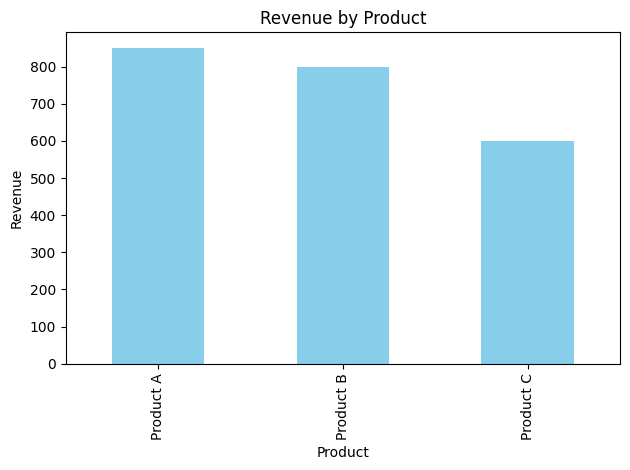

In [5]:
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Saves chart in same folder
plt.show()

In [6]:
conn.close()